# **Extract (Pengambilan Data)**

In [ ]:
import kagglehub
import pandas as pd

path_tanaman = kagglehub.dataset_download("datasetengineer/smart-farming-data-2024-sf24")
path_cuaca = kagglehub.dataset_download("lionelbottan/weatheraus")

print("Path to dataset files:", path_tanaman)
print("Path to dataset files:", path_cuaca)

Path to dataset files: /kaggle/input/smart-farming-data-2024-sf24
Path to dataset files: /kaggle/input/weatheraus


In [ ]:
!pip install pycaret

# **Transform (Pembersihan & Transformasi)**

In [ ]:
df_tanaman = pd.read_csv("/kaggle/input/smart-farming-data-2024-sf24/Crop_recommendationV2.csv")
df_cuaca = pd.read_csv("/kaggle/input/weatheraus/weatherAUS.csv")

In [ ]:
# Pengecakan apakah ada nilai yang null pada data tanaman

if df_tanaman.isnull().values.any():
    print("Ada nilai yang null.")
else:
    print("Tidak ada nilai yang null.")

df_tanaman.isnull().sum()

Tidak ada nilai yang null.


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0
soil_moisture,0
soil_type,0


In [ ]:
#Pengecekan apakah ada duplikasi pada data tanaman

if df_tanaman.duplicated().any():
    print("Ada duplikasi data.")
else:
    print("Tidak ada duplikasi data.")

df_tanaman.duplicated()

Tidak ada duplikasi data.


,0
0,False
1,False
2,False
3,False
4,False
...,...
2195,False
2196,False
2197,False
2198,False


In [ ]:
# Pengecakan apakah ada nilai yang null pada data cuaca

if df_cuaca.isnull().values.any():
    print("Ada nilai yang null.")
else:
    print("Tidak ada nilai yang null.")

df_cuaca.isnull().sum()

Ada nilai yang null.


,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
#Penghapusan nilai yang null pada data cuaca

df_cuaca = df_cuaca.dropna()

if df_cuaca.isnull().values.any():
    print("Ada nilai yang null.")
else:
    print("Tidak ada nilai yang null.")

df_cuaca.isnull().sum()

Tidak ada nilai yang null.


,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [ ]:
#Pengecekan apakah ada duplikasi data cuaca

if df_cuaca.duplicated().any():
    print("Ada duplikasi data.")
else:
    print("Tidak ada duplikasi data.")

df_cuaca.duplicated()

Tidak ada duplikasi data.


,0
6049,False
6050,False
6052,False
6053,False
6054,False
...,...
142298,False
142299,False
142300,False
142301,False


# **Pengelompokan Data**

In [ ]:
df_tanaman = df_tanaman[['label', 'temperature', 'rainfall']]
df_tanaman.rename(columns={'label': 'tanaman', 'temperature': 'Temperatur', 'rainfall': 'Rainfall'}, inplace=True) #Mengubah nama fitur
df_tanaman.head(10)

,tanaman,Temperatur,Rainfall
0,rice,20.879744,202.935536
1,rice,21.770462,226.655537
2,rice,23.004459,263.964248
3,rice,26.491096,242.864034
4,rice,20.130175,262.717340
5,rice,23.058049,251.055000
6,rice,22.708838,271.324860
7,rice,20.277744,241.974195
8,rice,24.515881,230.446236
9,rice,23.223974,221.209196


In [ ]:
df_cuaca = df_cuaca[['Location', 'MinTemp', 'MaxTemp', 'Rainfall']]
df_cuaca.reset_index(drop=True, inplace=True) #data sebelumnya dimulai dari index 6049, mengulang index dari awal
df_cuaca.head()

,Location,MinTemp,MaxTemp,Rainfall
0,Cobar,17.9,35.2,0.0
1,Cobar,18.4,28.9,0.0
2,Cobar,19.4,37.6,0.0
3,Cobar,21.9,38.4,0.0
4,Cobar,24.2,41.0,0.0


# **Clustering**

In [ ]:
df_cuaca['Temperatur'] = df_cuaca[['MinTemp', 'MaxTemp']].median(axis=1)

# Ambil hanya kolom yang diinginkan
df_hasil = df_cuaca[['Location', 'Temperatur', 'Rainfall']]

df_hasil.head(10)

,Location,Temperatur,Rainfall
0,Cobar,26.55,0.0
1,Cobar,23.65,0.0
2,Cobar,28.50,0.0
3,Cobar,30.15,0.0
4,Cobar,32.60,0.0
5,Cobar,31.60,0.0
6,Cobar,28.65,0.0
7,Cobar,25.15,0.0
8,Cobar,27.25,0.0
9,Cobar,27.60,0.0


,Description,Value
0,Session id,123
1,Original data shape,"(56420, 3)"
2,Transformed data shape,"(56420, 28)"
3,Numeric features,2
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0810,2548.5679,3.0742,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Location  Temperatur  Rainfall    Cluster
0     Cobar   26.549999       0.0  Cluster 1
1     Cobar   23.650000       0.0  Cluster 1
2     Cobar   28.500000       0.0  Cluster 1
3     Cobar   30.150000       0.0  Cluster 1
4     Cobar   32.599998       0.0  Cluster 1
5     Cobar   31.600000       0.0  Cluster 1
6     Cobar   28.650000       0.0  Cluster 1
7     Cobar   25.150000       0.0  Cluster 1
8     Cobar   27.250000       0.0  Cluster 1
9     Cobar   27.600000       0.0  Cluster 1
10    Cobar   29.350000       0.0  Cluster 1
11    Cobar   31.500000       0.0  Cluster 1
12    Cobar   33.049999       0.0  Cluster 1
13    Cobar   32.849998       0.0  Cluster 1
14    Cobar   27.900000       0.0  Cluster 1
15    Cobar   25.100000       0.0  Cluster 1
16    Cobar   26.049999       0.0  Cluster 1
17    Cobar   29.450001       0.0  Cluster 1
18    Cobar   31.350000       4.8  Cluster 1
19    Cobar   29.450001       0.0  Cluster 1


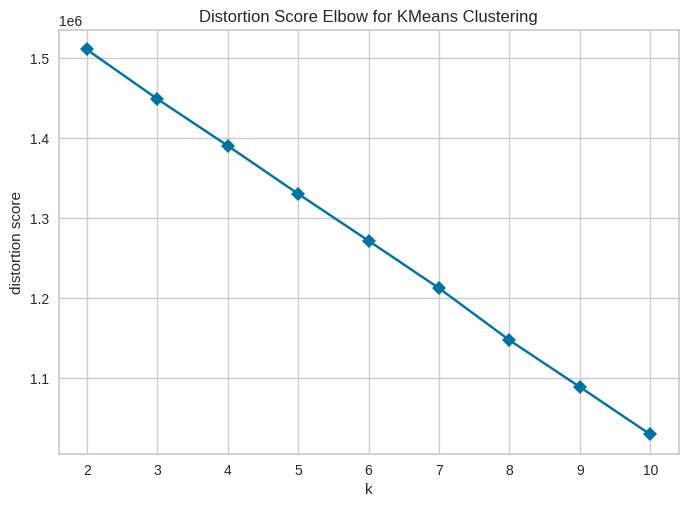

In [ ]:
from pycaret.clustering import *

# Setup PyCaret clustering environment
clust_setup = setup(data=df_hasil,
                    session_id=123,
                    normalize=True,
                    )

# Membuat model K-Means
kmeans = create_model('kmeans', num_clusters=3)  # Ganti angka 3 dengan jumlah cluster yang diinginkan

# Menetapkan hasil clustering ke dataframe
df_hasil_with_cluster = assign_model(kmeans)

# Menampilkan 10 baris pertama dengan cluster assignment
print(df_hasil_with_cluster.head(20))

# Visualisasi cluster
plot_model(kmeans, plot='cluster')  # Visualisasi 2D cluster
plot_model(kmeans, plot='elbow')   # Elbow method untuk menentukan jumlah cluster optimal

# **Rekomendasi Tanaman Berdasarkan Curah Hujan dan Suhu di Australia**

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [ ]:
# Training KNN pada data lokasi
X_lokasi = df_hasil_with_cluster[['Temperatur', 'Rainfall']]
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(X_lokasi)

# Cari lokasi paling dekat untuk tiap tanaman
X_tanaman = df_tanaman[['Temperatur', 'Rainfall']]
distances, indices = knn.kneighbors(X_tanaman)

# Tambahkan kolom lokasi cocok ke DataFrame tanaman
df_tanaman['Cocok_Di_Lokasi'] = df_hasil_with_cluster.loc[indices.flatten(), 'Location'].values

df_tanaman.head(5000)

# Simpan ke file CSV
df_tanaman.to_csv('tanaman_dengan_lokasi_cocok.csv', index=False)

Kolom: Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Temperatur'], dtype='object')

Hasil Analisis:
            Location  Suhu_Tertinggi  Suhu_Terendah  Curah_Hujan_Tertinggi  \
0       AliceSprings            44.9           -5.2                   62.0   
1           Brisbane            38.9            2.6                  182.6   
2             Cairns            38.6            9.3                  206.2   
3           Canberra            40.0           -6.7                   55.4   
4              Cobar            45.4            0.0                   44.0   
5       CoffsHarbour            37.7            0.6                  128.0   
6             Darwin            38.0           12.5                  132.6   
7             Hobart            38.3            0.3                   62.8   
8          Melbourne            46.4            2.3                   82.2   
9   MelbourneAirport            46.8           -1.0                   75.8   
10           Mildura            46

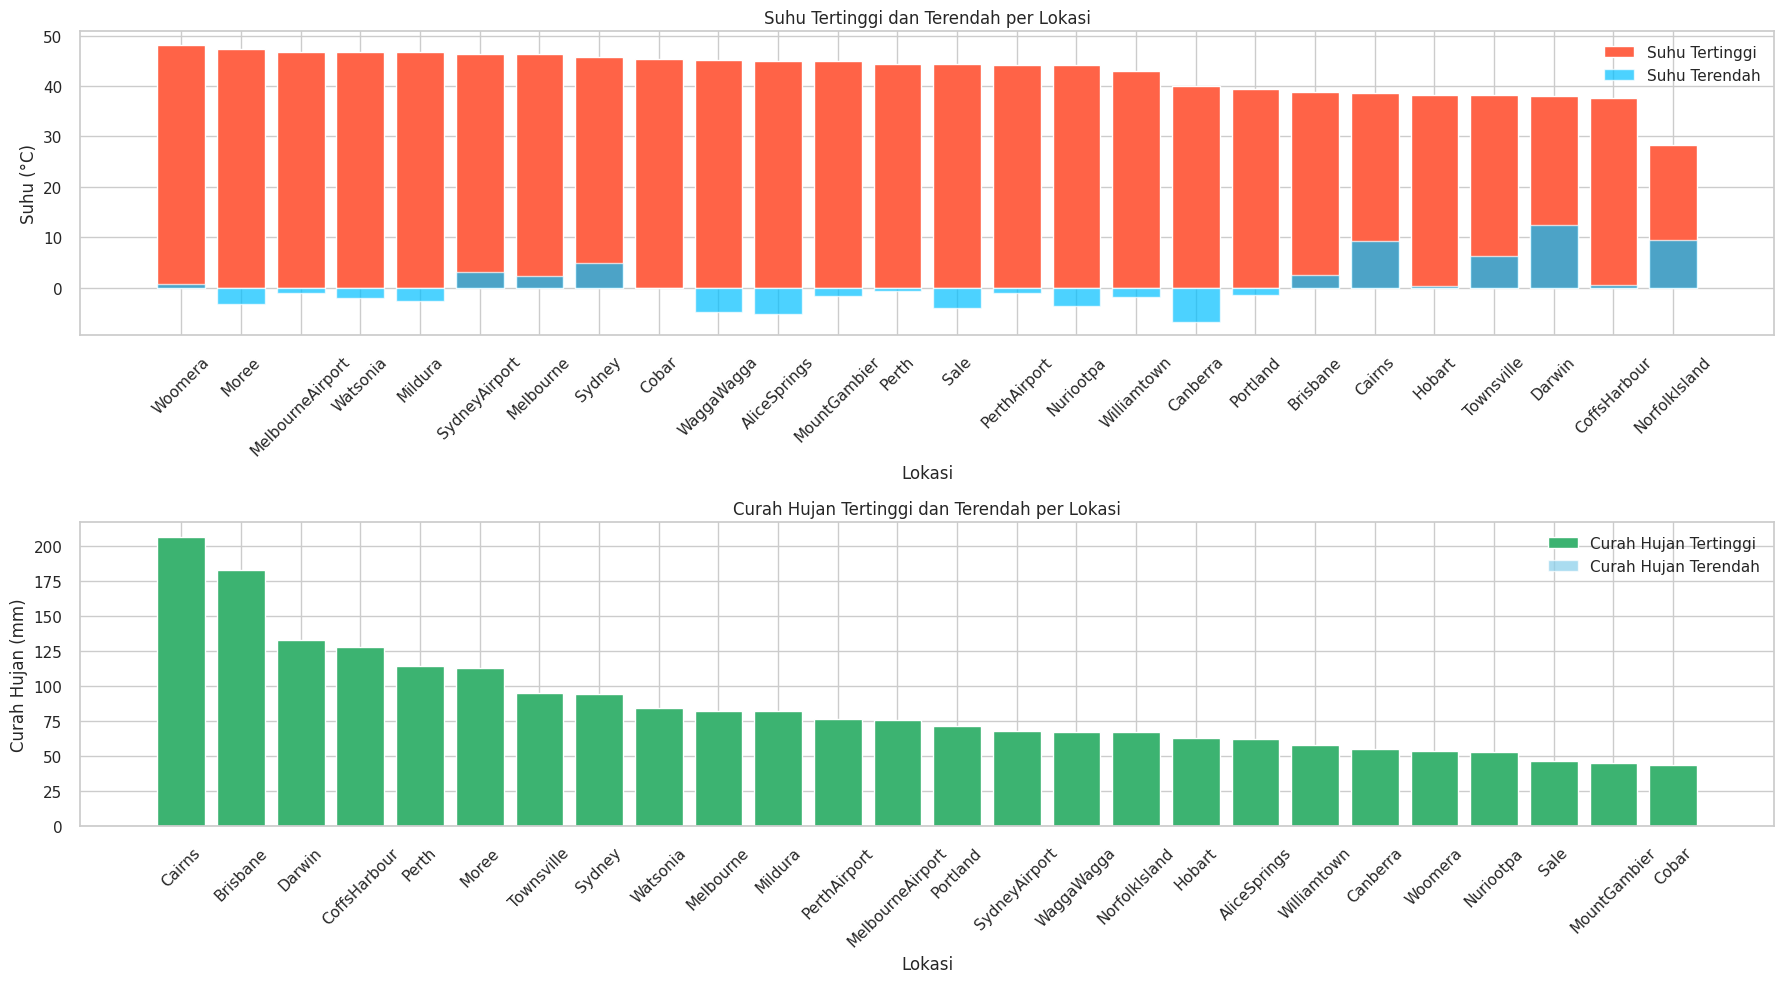

In [ ]:
# @title Serving analisis
# Langkah 1: Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 2: Membaca Data
df = df_cuaca

# Tampilkan kolom untuk pengecekan
print("Kolom:", df.columns)

# Langkah 3: Tentukan nama kolom yang sesuai
lokasi_col = 'Location'
suhu_min_col = 'MinTemp'
suhu_max_col = 'MaxTemp'
hujan_col = 'Rainfall'

# Langkah 4: Analisis Data
suhu_max = df.groupby(lokasi_col)[suhu_max_col].max().reset_index().rename(columns={suhu_max_col: 'Suhu_Tertinggi'})
suhu_min = df.groupby(lokasi_col)[suhu_min_col].min().reset_index().rename(columns={suhu_min_col: 'Suhu_Terendah'})
hujan_max = df.groupby(lokasi_col)[hujan_col].max().reset_index().rename(columns={hujan_col: 'Curah_Hujan_Tertinggi'})
hujan_min = df.groupby(lokasi_col)[hujan_col].min().reset_index().rename(columns={hujan_col: 'Curah_Hujan_Terendah'})

# Gabungkan data
hasil = suhu_max.merge(suhu_min, on=lokasi_col)\
                .merge(hujan_max, on=lokasi_col)\
                .merge(hujan_min, on=lokasi_col)

# Tampilkan hasil analisis
print("\nHasil Analisis:")
print(hasil)

# Simpan ke file
hasil.to_csv('hasil_analisis_suhu_dan_hujan.csv', index=False)

# Langkah 5: Visualisasi
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Subplot 1: Suhu
plt.subplot(2, 1, 1)
df_plot1 = hasil.sort_values('Suhu_Tertinggi', ascending=False)
x = df_plot1[lokasi_col]
plt.bar(x, df_plot1['Suhu_Tertinggi'], color='tomato', label='Suhu Tertinggi')
plt.bar(x, df_plot1['Suhu_Terendah'], color='deepskyblue', label='Suhu Terendah', alpha=0.7)
plt.title('Suhu Tertinggi dan Terendah per Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Suhu (°C)')
plt.xticks(rotation=45)
plt.legend()

# Subplot 2: Curah Hujan
plt.subplot(2, 1, 2)
df_plot2 = hasil.sort_values('Curah_Hujan_Tertinggi', ascending=False)
x2 = df_plot2[lokasi_col]
plt.bar(x2, df_plot2['Curah_Hujan_Tertinggi'], color='mediumseagreen', label='Curah Hujan Tertinggi')
plt.bar(x2, df_plot2['Curah_Hujan_Terendah'], color='skyblue', label='Curah Hujan Terendah', alpha=0.7)
plt.title('Curah Hujan Tertinggi dan Terendah per Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Rata-rata kebutuhan pupuk NPK per tanaman:
        Tanaman       N       P       K
0         apple   20.80  134.22  199.89
1        banana  100.23   82.01   50.05
2     blackgram   40.02   67.47   19.24
3      chickpea   40.09   67.79   79.92
4       coconut   21.98   16.93   30.59
5        coffee  101.20   28.74   29.94
6        cotton  117.77   46.24   19.56
7        grapes   23.18  132.53  200.11
8          jute   78.40   46.86   39.99
9   kidneybeans   20.75   67.54   20.05
10       lentil   18.77   68.36   19.41
11        maize   77.76   48.44   19.79
12        mango   20.07   27.18   29.92
13    mothbeans   21.44   48.01   20.23
14     mungbean   20.99   47.28   19.87
15    muskmelon  100.32   17.72   50.08
16       orange   19.58   16.55   10.01
17       papaya   49.88   59.05   50.04
18   pigeonpeas   20.73   67.73   20.29
19  pomegranate   18.87   18.75   40.21
20         rice   79.89   47.58   39.87
21   watermelon   99.42   17.00   50.22


<Figure size 1200x600 with 0 Axes>

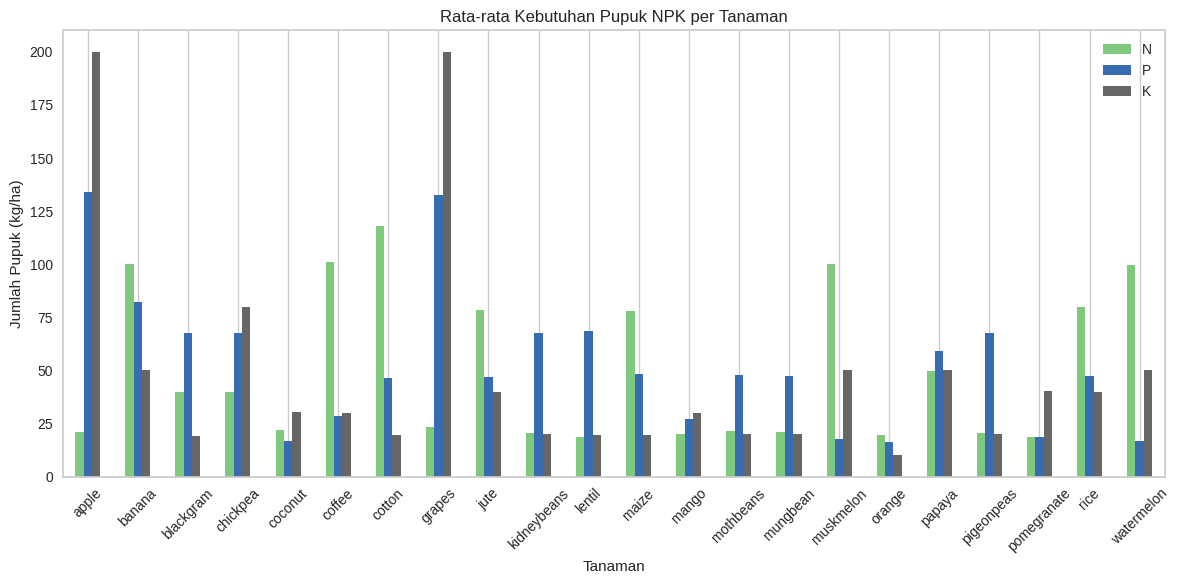


Tanaman dengan kebutuhan Nitrogen (N) tertinggi:
Tanaman    cotton
N          117.77
P           46.24
K           19.56
Name: 6, dtype: object

Kategori kebutuhan NPK per tanaman:
        Tanaman Kategori_N Kategori_P Kategori_K
0         apple     Rendah     Tinggi     Tinggi
1        banana     Tinggi     Tinggi     Tinggi
2     blackgram     Sedang     Tinggi     Rendah
3      chickpea     Sedang     Tinggi     Tinggi
4       coconut     Sedang     Rendah     Sedang
5        coffee     Tinggi     Rendah     Sedang
6        cotton     Tinggi     Sedang     Rendah
7        grapes     Sedang     Tinggi     Tinggi
8          jute     Tinggi     Sedang     Sedang
9   kidneybeans     Rendah     Tinggi     Rendah
10       lentil     Rendah     Tinggi     Rendah
11        maize     Tinggi     Sedang     Rendah
12        mango     Rendah     Rendah     Sedang
13    mothbeans     Sedang     Sedang     Sedang
14     mungbean     Sedang     Sedang     Rendah
15    muskmelon     Tinggi     Ren

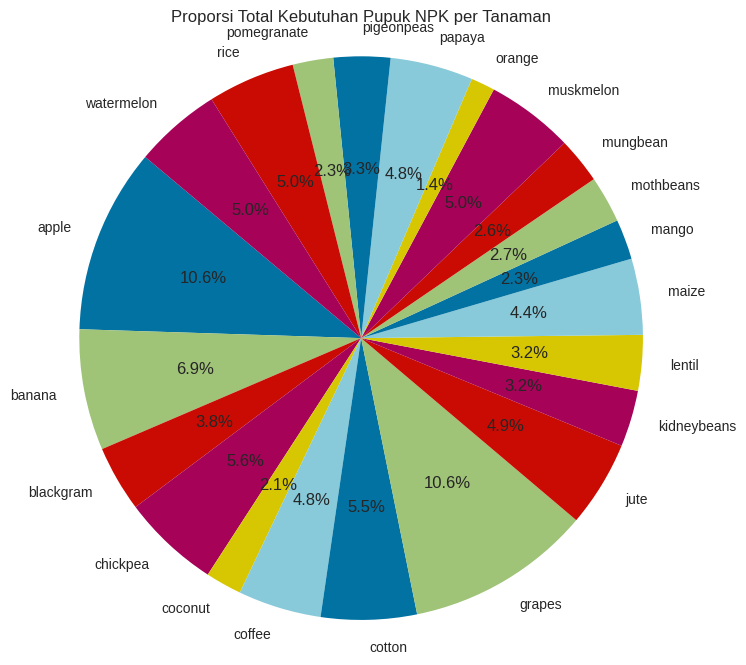

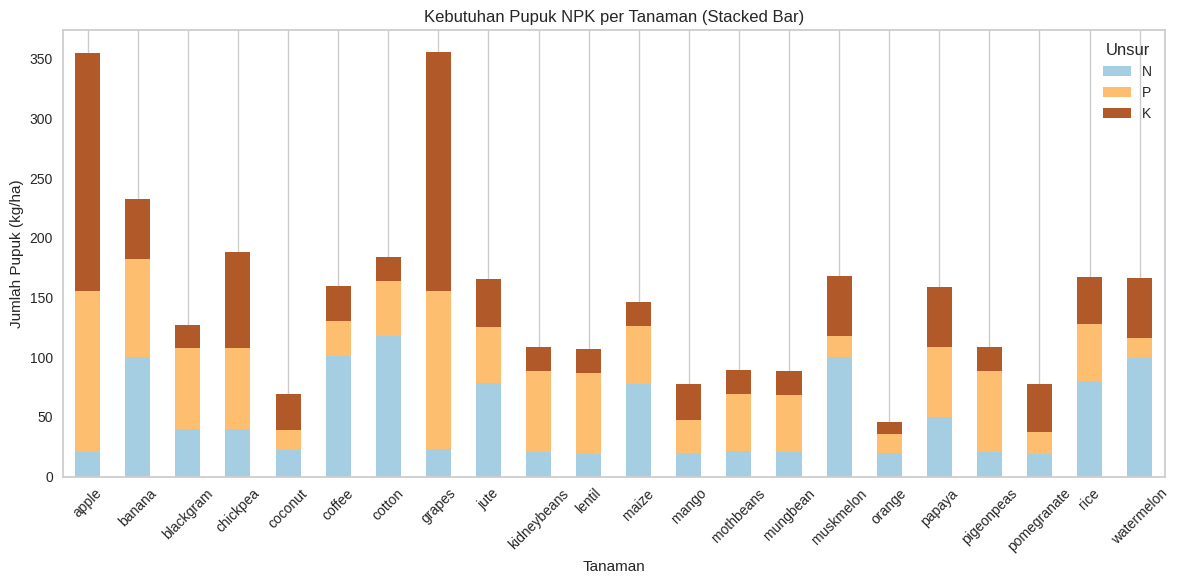

In [ ]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub # Import kagglehub to get the path again

# Langkah 2: Baca dataset
# Read the original dataset to ensure 'N', 'P', and 'K' columns are present
path_tanaman = kagglehub.dataset_download("datasetengineer/smart-farming-data-2024-sf24")
df_tanaman_original = pd.read_csv("/kaggle/input/smart-farming-data-2024-sf24/Crop_recommendationV2.csv")

# Langkah 3: Analisis rata-rata kebutuhan pupuk NPK per tanaman
# Use the original dataframe with N, P, K columns for NPK analysis
hasil_npk = df_tanaman_original.groupby('label')[['N', 'P', 'K']].mean().reset_index()
# Mengganti nama kolom 'label' menjadi 'Tanaman' pada hasil analisis
hasil_npk = hasil_npk.rename(columns={'label': 'Tanaman'})

# Tampilkan hasil
print("Rata-rata kebutuhan pupuk NPK per tanaman:")
print(hasil_npk)

# Simpan ke file CSV
hasil_npk.to_csv('analisis_npk_per_tanaman.csv', index=False)

# Langkah 4: Visualisasi
plt.figure(figsize=(12, 6))
hasil_npk_plot = hasil_npk.set_index('Tanaman')
hasil_npk_plot.plot(kind='bar', figsize=(12, 6), colormap='Accent')
plt.title('Rata-rata Kebutuhan Pupuk NPK per Tanaman')
plt.ylabel('Jumlah Pupuk (kg/ha)')
plt.xlabel('Tanaman')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tanaman dengan kebutuhan Nitrogen (N) tertinggi
tanaman_n_tertinggi = hasil_npk.loc[hasil_npk['N'].idxmax()]
print("\nTanaman dengan kebutuhan Nitrogen (N) tertinggi:")
print(tanaman_n_tertinggi)

# Fungsi untuk mengkategorikan
def kategori_kebutuhan(nilai, kolom):
    q1 = hasil_npk[kolom].quantile(0.33)
    q2 = hasil_npk[kolom].quantile(0.66)
    if nilai <= q1:
        return 'Rendah'
    elif nilai <= q2:
        return 'Sedang'
    else:
        return 'Tinggi'

# Tambahkan kolom kategori
hasil_npk['Kategori_N'] = hasil_npk['N'].apply(lambda x: kategori_kebutuhan(x, 'N'))
hasil_npk['Kategori_P'] = hasil_npk['P'].apply(lambda x: kategori_kebutuhan(x, 'P'))
hasil_npk['Kategori_K'] = hasil_npk['K'].apply(lambda x: kategori_kebutuhan(x, 'K'))

print("\nKategori kebutuhan NPK per tanaman:")
print(hasil_npk[['Tanaman', 'Kategori_N', 'Kategori_P', 'Kategori_K']])

# Total NPK per tanaman
hasil_npk['Total_NPK'] = hasil_npk[['N', 'P', 'K']].sum(axis=1)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(hasil_npk['Total_NPK'], labels=hasil_npk['Tanaman'], autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Total Kebutuhan Pupuk NPK per Tanaman')
plt.axis('equal')
plt.show()

# Stacked bar
hasil_npk_plot = hasil_npk.set_index('Tanaman')[['N', 'P', 'K']]
hasil_npk_plot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Kebutuhan Pupuk NPK per Tanaman (Stacked Bar)')
plt.ylabel('Jumlah Pupuk (kg/ha)')
plt.xlabel('Tanaman')
plt.xticks(rotation=45)
plt.legend(title='Unsur')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [ ]:
# Tanaman dengan kebutuhan Nitrogen (N) tertinggi
tanaman_n_tertinggi = hasil_npk.loc[hasil_npk['N'].idxmax()]
print("\nTanaman dengan kebutuhan Nitrogen (N) tertinggi:")
print(tanaman_n_tertinggi)



Tanaman dengan kebutuhan Nitrogen (N) tertinggi:
Tanaman       cotton
N             117.77
P              46.24
K              19.56
Kategori_N    Tinggi
Kategori_P    Sedang
Kategori_K    Rendah
Total_NPK     183.57
Name: 6, dtype: object


In [ ]:
# Fungsi untuk mengkategorikan
def kategori_kebutuhan(nilai, kolom):
    q1 = hasil_npk[kolom].quantile(0.33)
    q2 = hasil_npk[kolom].quantile(0.66)
    if nilai <= q1:
        return 'Rendah'
    elif nilai <= q2:
        return 'Sedang'
    else:
        return 'Tinggi'

# Tambahkan kolom kategori
hasil_npk['Kategori_N'] = hasil_npk['N'].apply(lambda x: kategori_kebutuhan(x, 'N'))
hasil_npk['Kategori_P'] = hasil_npk['P'].apply(lambda x: kategori_kebutuhan(x, 'P'))
hasil_npk['Kategori_K'] = hasil_npk['K'].apply(lambda x: kategori_kebutuhan(x, 'K'))

print("\nKategori kebutuhan NPK per tanaman:")
print(hasil_npk[['Tanaman', 'Kategori_N', 'Kategori_P', 'Kategori_K']])



Kategori kebutuhan NPK per tanaman:
        Tanaman Kategori_N Kategori_P Kategori_K
0         apple     Rendah     Tinggi     Tinggi
1        banana     Tinggi     Tinggi     Tinggi
2     blackgram     Sedang     Tinggi     Rendah
3      chickpea     Sedang     Tinggi     Tinggi
4       coconut     Sedang     Rendah     Sedang
5        coffee     Tinggi     Rendah     Sedang
6        cotton     Tinggi     Sedang     Rendah
7        grapes     Sedang     Tinggi     Tinggi
8          jute     Tinggi     Sedang     Sedang
9   kidneybeans     Rendah     Tinggi     Rendah
10       lentil     Rendah     Tinggi     Rendah
11        maize     Tinggi     Sedang     Rendah
12        mango     Rendah     Rendah     Sedang
13    mothbeans     Sedang     Sedang     Sedang
14     mungbean     Sedang     Sedang     Rendah
15    muskmelon     Tinggi     Rendah     Tinggi
16       orange     Rendah     Rendah     Rendah
17       papaya     Sedang     Sedang     Tinggi
18   pigeonpeas     Rendah     T

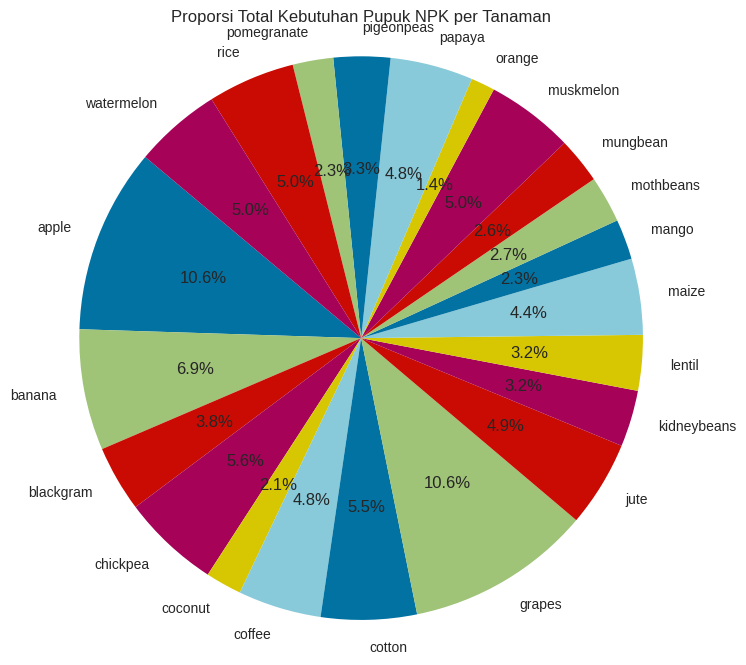

In [ ]:
# Total NPK per tanaman
hasil_npk['Total_NPK'] = hasil_npk[['N', 'P', 'K']].sum(axis=1)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(hasil_npk['Total_NPK'], labels=hasil_npk['Tanaman'], autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Total Kebutuhan Pupuk NPK per Tanaman')
plt.axis('equal')
plt.show()


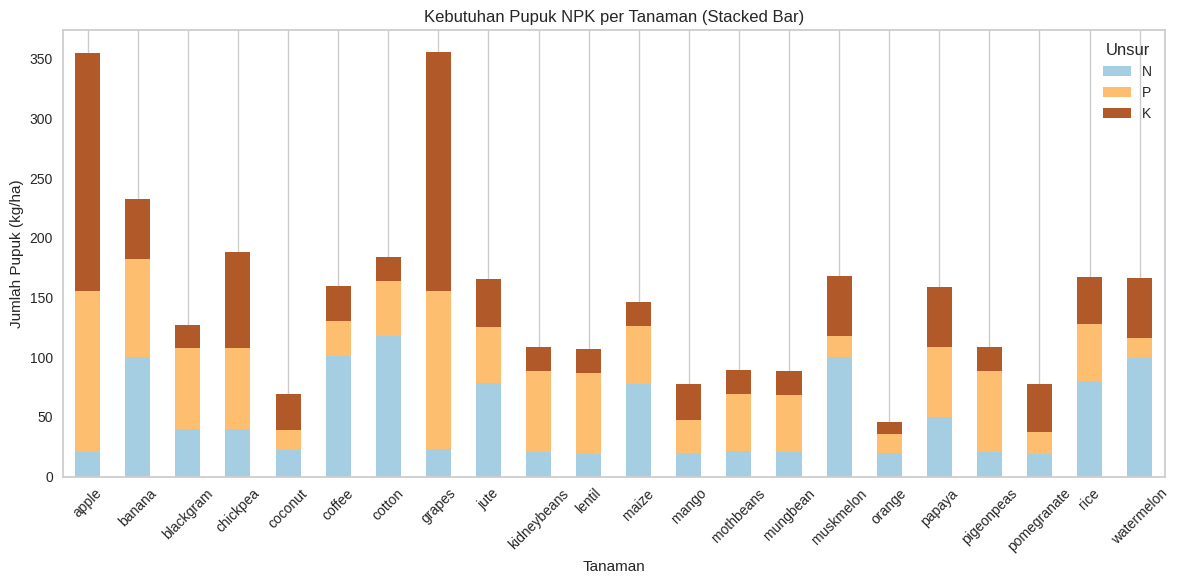

In [ ]:
# Stacked bar
hasil_npk_plot = hasil_npk.set_index('Tanaman')[['N', 'P', 'K']]
hasil_npk_plot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Kebutuhan Pupuk NPK per Tanaman (Stacked Bar)')
plt.ylabel('Jumlah Pupuk (kg/ha)')
plt.xlabel('Tanaman')
plt.xticks(rotation=45)
plt.legend(title='Unsur')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [ ]:
!pip install sqlalchemy psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.9 MB/s eta 0:00:00


In [ ]:
# @title Aiven

import pandas as pd
from sqlalchemy import create_engine

# 1. Info koneksi PostgreSQL Aiven (ganti dengan milikmu)
db_user = 'adam'
db_pass = 'AVNS_-ADg7BC5Vt_MjERrMkT'
db_host = 'pg-920d042-teamproject.h.aivencloud.com'
db_port = '22339'
db_name = 'defaultdb'
db_url = f'postgresql://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}'
engine = create_engine(db_url)

In [ ]:
df_lokasi = pd.read_sql('SELECT * FROM tabel_lokasi_tanaman', engine)
print(df_lokasi.head(100))

   tanaman  Temperatur    Rainfall Cocok_Di_Lokasi
0     rice   20.879744  202.935536          Cairns
1     rice   21.770462  226.655537          Cairns
2     rice   23.004459  263.964248          Cairns
3     rice   26.491096  242.864034          Cairns
4     rice   20.130175  262.717340          Cairns
..     ...         ...         ...             ...
95    rice   22.683191  194.265172          Cairns
96    rice   21.533463  295.924880          Cairns
97    rice   21.408658  287.576693          Cairns
98    rice   26.543481  183.622266          Cairns
99    rice   23.359054  188.413665          Cairns

[100 rows x 4 columns]
